**Import All Libraries**

In [427]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import plotly.express as px

**Read the dataset**




In [428]:
loan = pd.read_csv(r"/content/loan.csv")
loan_dd = pd.ExcelFile(r"/content/Data_Dictionary.xlsx")
sheetnames = loan_dd.sheet_names
print(sheetnames)
for i in sheetnames:
  globals()[f"loan_dd_{i}"] = pd.read_excel(loan_dd, i)

#check total columns in loan dataset
total_columns = len(loan.columns)

#Setting columns display limit to total_columns
pd.set_option('display.max_columns', total_columns)

['LoanStats', 'RejectStats']


**Basic information about the data**

In [429]:
#Number of rows and columns
print('Number of Columns:',loan.shape[1])
print('Number of Rows:',loan.shape[0])
#Number of missing values
print('Number of missing values:',loan.isnull().sum().sum())
#Number of unique values
print('Number of unique values:',loan.nunique().sum())
#Number of duplicates
print('Number of duplicates:',loan.duplicated().sum())

Number of Columns: 111
Number of Rows: 39717
Number of missing values: 2263366
Number of unique values: 416800
Number of duplicates: 0


#**Cleaning Loan Data Set**

**Check for first 5 rows of loan dataset**

In [430]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

**Generate descriptive statistics of a DataFrame**

In [431]:
loan.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,26775,39717,39706,39717,39717,39717.000000,39717.000000,39717,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,1140,39715,39661.0,0.0,39717.0,39717,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,1,39717,26526,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,2,106,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,Jun-16,May-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,39717,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,1125,10308,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.14

**Check for Data Type, Null % and Unique Value value**



In [432]:
temp=pd.DataFrame(index=loan.columns)
temp['DataType'] = loan.dtypes
temp['Null (%)']=loan.isnull().sum()/len(loan)*100
temp['Unique_Counts'] = loan.nunique()
print(len(loan))
temp

39717


,DataType,Null (%),Unique_Counts
id,int64,0.000000,39717
member_id,int64,0.000000,39717
loan_amnt,int64,0.000000,885
funded_amnt,int64,0.000000,1041
funded_amnt_inv,float64,0.000000,8205
term,object,0.000000,2
int_rate,object,0.000000,371
installment,float64,0.000000,15383
grade,object,0.000000,7
sub_grade,object,0.000000,35


Column in a dataset has more than 50% null values,it is considered a good practice to delete it

**Delete Cols where null % is grater then equal to 50%**

In [433]:
del_cols = list(temp[temp['Null (%)']>=50].index)
loan.drop(del_cols,axis=1,inplace=True)

If a column in a dataset has only one unique value, it generally won't be very useful for analysis because it doesn't provide any variability or differentiation across the data

**Delete Cols where unique value is 1**



In [434]:
del_cols = list(temp[temp['Unique_Counts']==1].index)
loan.drop(del_cols,axis=1,inplace=True)

**No relationship to other variables.**
Here, **id, member_id, url and desc** don't help uncover patterns or relationships with the target variable or other features, which makes it irrelevant in many kinds of analysis

In [435]:
del_cols = ['id','member_id','url','desc']
loan.drop(del_cols,axis=1,inplace=True)

The removed columns are customer behavior variables calculated after the analysis and cannot be used as inputs.

In [436]:
del_cols = [
    'last_credit_pull_d', 'total_rec_int', 'out_prncp', 'revol_util', 'total_pymnt_inv',
    'last_pymnt_d','funded_amnt_inv', 'earliest_cr_line','zip_code', 'open_acc', 'total_acc', 'delinq_2yrs', 'revol_bal',
    'collection_recovery_fee', 'title' ,'total_rec_prncp', 'emp_title', 'inq_last_6mths', 'recoveries', 'total_pymnt',
    'pub_rec', 'out_prncp_inv','last_pymnt_amnt','funded_amnt', 'total_rec_late_fee'
]
loan.drop(del_cols,axis=1,inplace=True)

#**Fill Null Values**

Using **annual_inc** fill Null value in **emp_title**.

In [437]:
# Step 1: Calculate the mode or mean of the 'annual_inc' column
mode_annual_inc = loan['annual_inc'].mode()[0]  # Mode: Most frequent value in 'annual_inc'
mean_annual_inc = loan['annual_inc'].mean()  # Mean: Average value in 'annual_inc'

# Choose to fill with mode or mean (you can comment/uncomment based on your choice)
fill_value = mode_annual_inc  # or use mean_annual_inc

# Step 2: For rows with NaN in 'emp_title', replace with the nearest value of 'annual_inc' from mode/mean
def get_nearest_emp_title(annual_inc_value):
    # Find the index of the row with the nearest annual_inc value
    nearest_idx = (loan['annual_inc'] - annual_inc_value).abs().idxmin()
    return loan.loc[nearest_idx, 'emp_length']

# Step 3: Replace NaN values in 'emp_title' with the corresponding nearest emp_title
loan['emp_length'] = loan.apply(
    lambda row: get_nearest_emp_title(fill_value) if pd.isna(row['emp_length']) else row['emp_length'],
    axis=1
)

**Since "pub_rec_bankruptcies" has only 3 unique values, we will fill the null values with the most frequent value.**

In [438]:
occ = loan['pub_rec_bankruptcies'].value_counts().index[0]
loan['pub_rec_bankruptcies'].fillna(occ,inplace=True)

# **Restructe the Data**

In [439]:
#emp_length to float by removing years, < 1 to .5 and 10+ to 10
print(loan.emp_length.unique())
loan['emp_length'] = loan['emp_length'].str.replace(" years","").str.replace("+","").str.replace("< 1",".5").str.replace(" year","").str.strip()
loan['emp_length'] = loan['emp_length'].astype(float)

#term to int by removing months
loan['term'] = loan['term'].str.replace('months','').str.strip().astype(int)

#int_rate to float by removing %
loan['int_rate'] = loan['int_rate'].str.replace('%','').str.strip()
loan['int_rate'] = loan['int_rate'].astype(float)

#convert datatype to category
cat_cols = ['verification_status','addr_state','home_ownership','purpose','grade','sub_grade']
for i in cat_cols:
  loan[i] = loan[i].astype('category')

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']


# **Remove Outliers**

In [440]:
# Apply the outlier removal process to all numeric columns
for column in loan.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = loan[column].quantile(0.25)
    Q3 = loan[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    loan = loan[(loan[column] >= lower_bound) & (loan[column] <= upper_bound)]
print("Outliers Removed")

Outliers Removed


# **EDA**

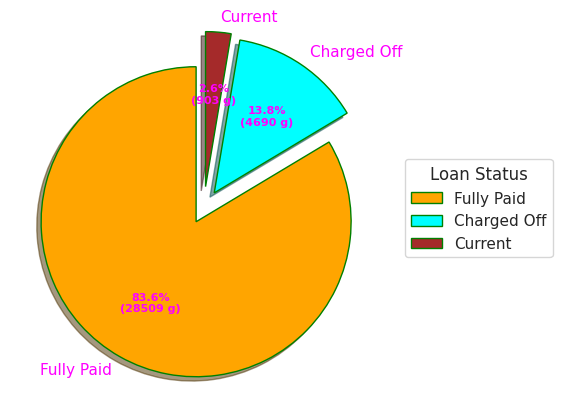

In [441]:
#Loan Status
data = loan['loan_status'].value_counts().reset_index()

# Creating explode data
explode = (0.1, 0.12,0.14)

# Creating color parameters
colors = ("orange", "cyan", "brown")

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}

# Creating autocpt arguments


def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


# Creating plot
fig, ax = plt.subplots(figsize=(5, 7))
wedges, texts, autotexts = ax.pie(data['count'].to_list(),
                                  autopct=lambda pct: func(pct, data['count'].to_list()),
                                  explode=explode,
                                  labels=data['loan_status'].to_list(),
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="magenta"))

# Adding legend
ax.legend(wedges, data['loan_status'].to_list(),
          title="Loan Status",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")


# show plot
plt.show()

**Current Loan Data is not useful to analysis. So will remove current loan status.**

In [442]:
loan = loan[loan['loan_status']!='Current']

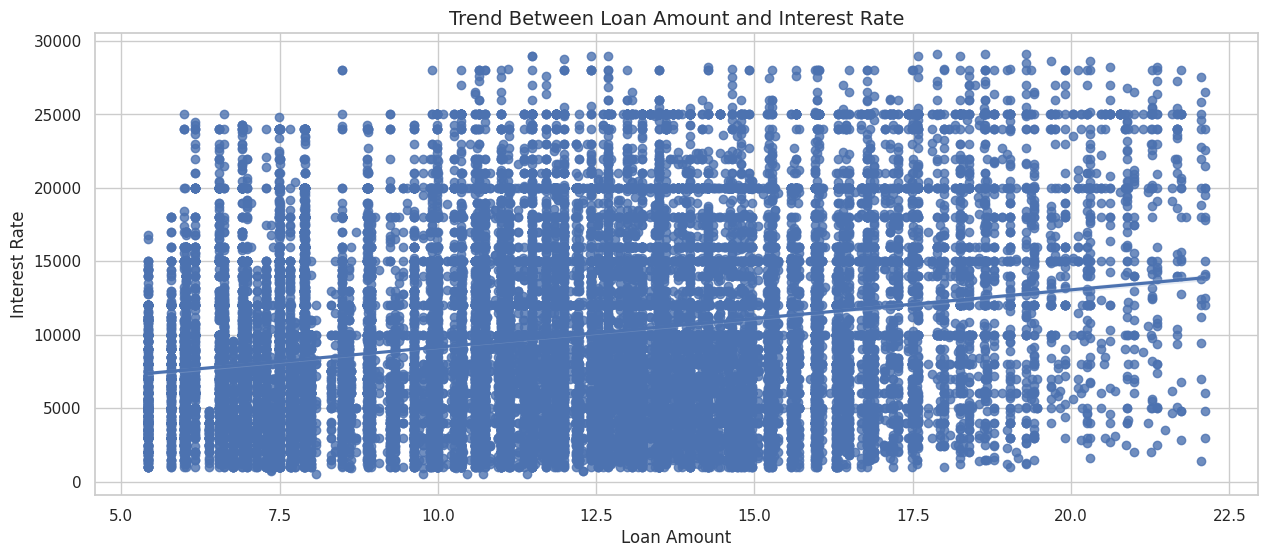

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,Year,Month
0,5000,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,2011,Dec
1,2500,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0,2011,Dec
2,2400,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0,2011,Dec
3,10000,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0,2011,Dec
5,5000,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0,2011,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,5000,36,8.70,158.30,B,B1,5.0,MORTGAGE,75000.0,Not Verified,Jul-07,Fully Paid,credit_card,CO,15.55,0.0,2007,Jul
39712,2500,36,8.07,78.42,A,A4,4.0,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0.0,2007,Jul
39713,8500,36,10.28,275.38,C,C1,3.0,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,0.0,2007,Jul
39714,5000,36,8.07,156.84,A,A4,0.5,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0.0,2007,Jul


In [462]:
#Loan Amount Vs Interest Rate
sns.set(style='whitegrid')

plt.figure(figsize=(15, 6))
sns.regplot(x="int_rate",
                    y="loan_amnt",
                    data=loan)
# Adding labels and title
plt.title('Trend Between Loan Amount and Interest Rate', fontsize=14)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Interest Rate', fontsize=12)
# Show the plot
plt.show()


500

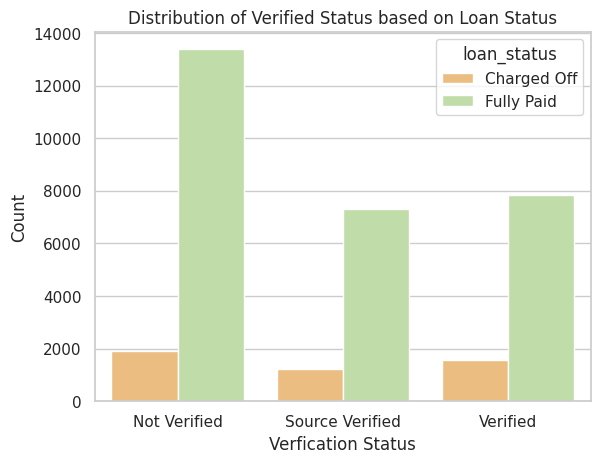

In [444]:
#Verfication Status
grade_data = loan.groupby(['verification_status','loan_status'])['grade'].count().reset_index()
sns.barplot(x=grade_data['verification_status'].to_list(), y=grade_data['grade'].to_list(),hue=grade_data['loan_status'] , palette='Spectral')
plt.xlabel('Verfication Status')
plt.ylabel('Count')
plt.title('Distribution of Verified Status based on Loan Status')
plt.show()


In [463]:
# Distribution of purpose based on loan_status
grouped = loan.groupby(['purpose','loan_status'])['grade'].count().reset_index()
# Calculate total grade for each 'purpose'
grouped['total_purpose'] = grouped.groupby('purpose')['grade'].transform('sum')

# Calculate percentage
grouped['percentage'] = (grouped['grade'] / grouped['total_purpose']) * 100

# Drop the 'total_purpose' column if you don't want it in the final output
grouped = grouped.drop(columns=['total_purpose'])
grouped
fig = px.treemap(grouped,
                 path=['purpose', 'loan_status'],  # Hierarchical levels
                 values='percentage',                    # Values for sizing the blocks
                 hover_data=['grade'],              # Additional data to show on hover
                 title="Purpose")
# Show the plot
fig.show()

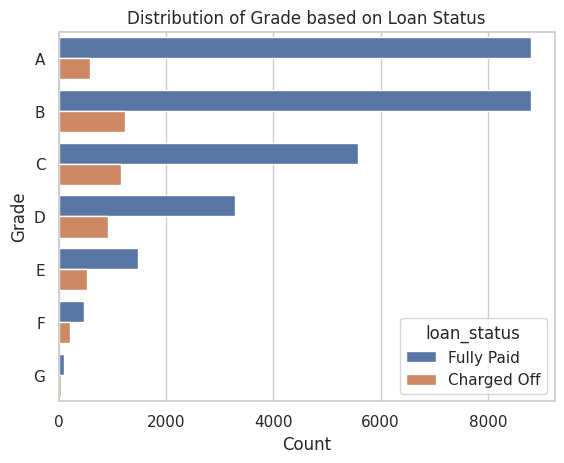

In [469]:
# Distribution of Grade based on loan_status
sns.countplot(data=loan,y='grade',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Grade')
plt.title('Distribution of Grade based on Loan Status')
plt.show()

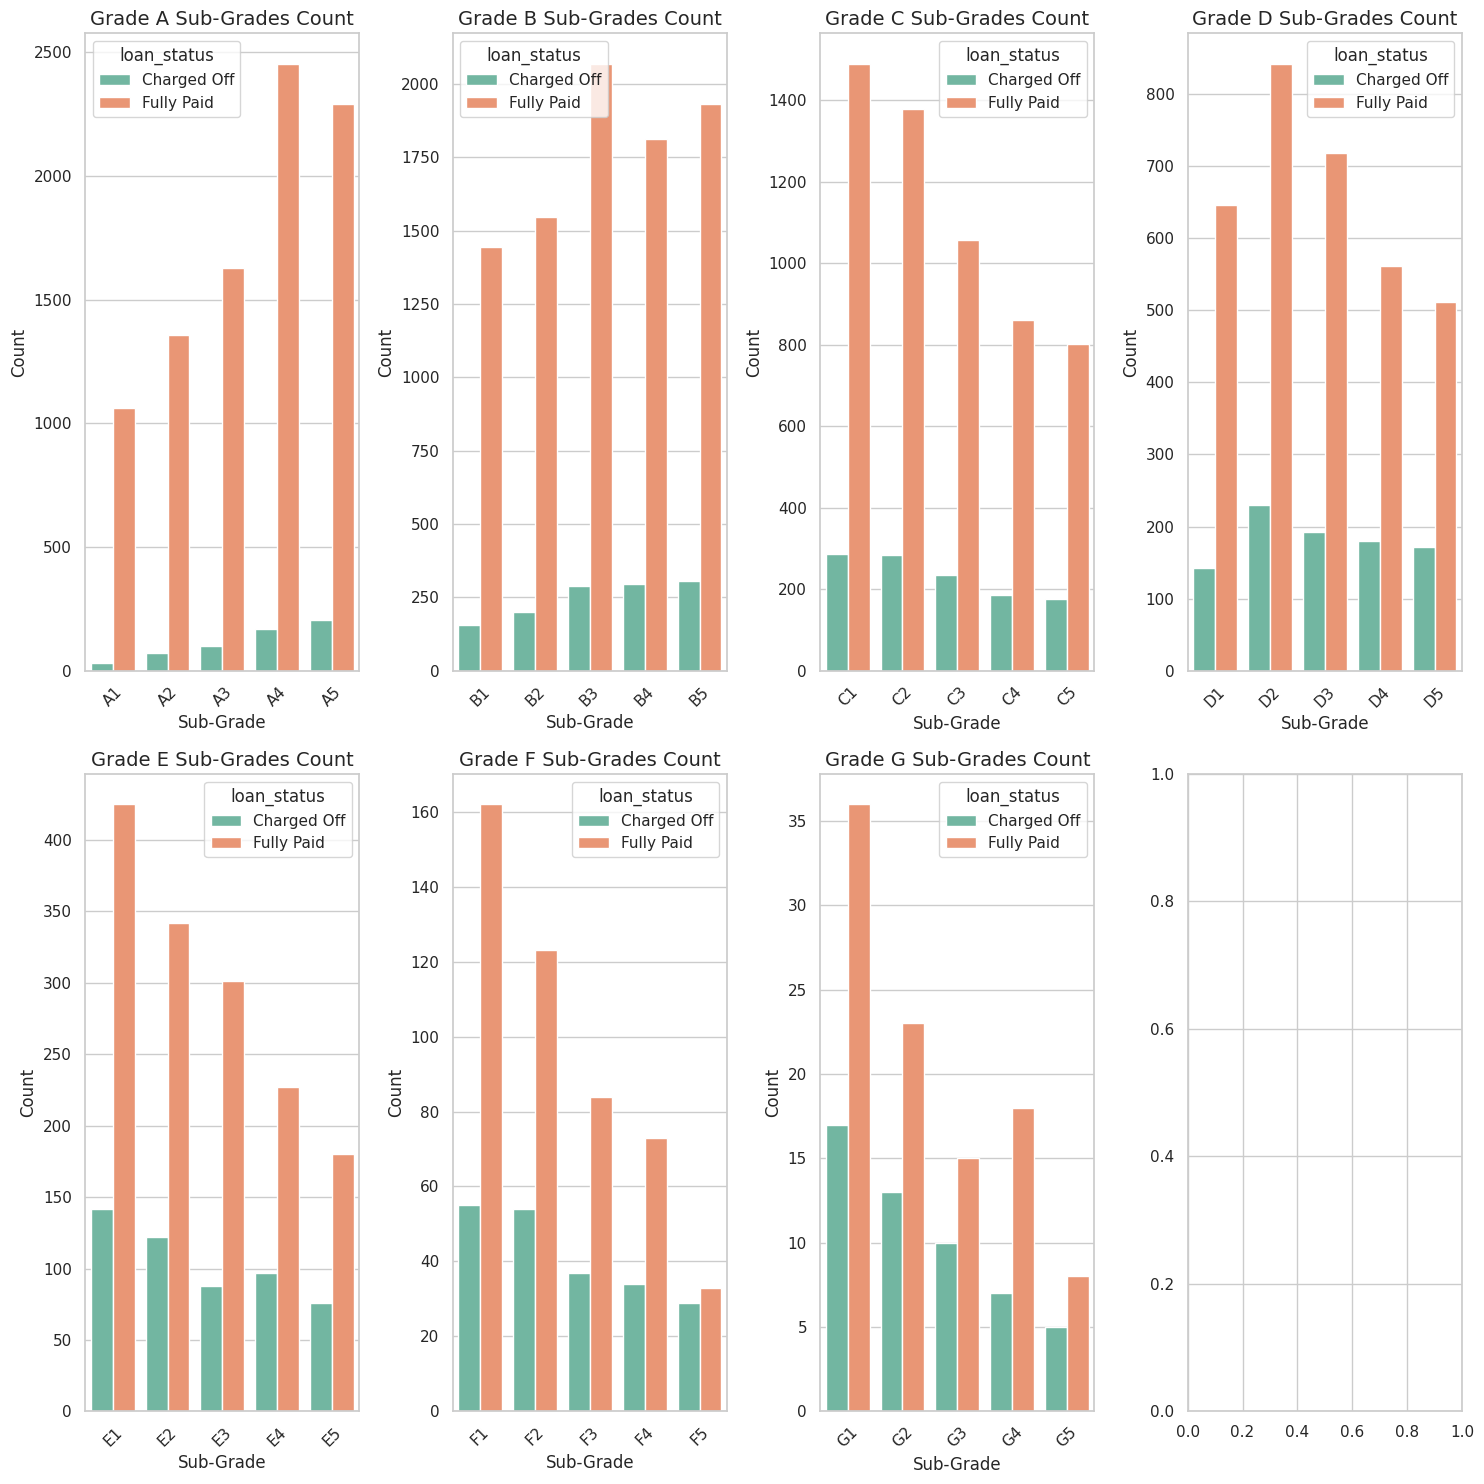

In [447]:
# Distribution of SubGrade based on loan_status
# Set up the figure with 3x3 subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 15))

# List of grades to plot
grades = loan['grade'].unique().to_list()
grades.sort()

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through each grade and plot the sub-grades for that grade
for i, grade in enumerate(grades):
    # Filter the data for the current grade (A, B, C, ...)
    grade_data = loan[loan['grade'] == grade]
    grade_data = grade_data.groupby(['sub_grade','loan_status'])['grade'].count().reset_index()
    grade_data = grade_data[grade_data['grade']>0]
    # Plot the count of sub_grades for this grade
    sns.barplot(x=grade_data['sub_grade'].to_list(), y=grade_data['grade'].to_list(),hue=grade_data['loan_status'] ,ax=axes[i], palette='Set2')

    # Set plot title and labels
    axes[i].set_title(f'Grade {grade} Sub-Grades Count', fontsize=14)
    axes[i].set_xlabel('Sub-Grade', fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

term
36    25428
60     7772
Name: grade, dtype: int64


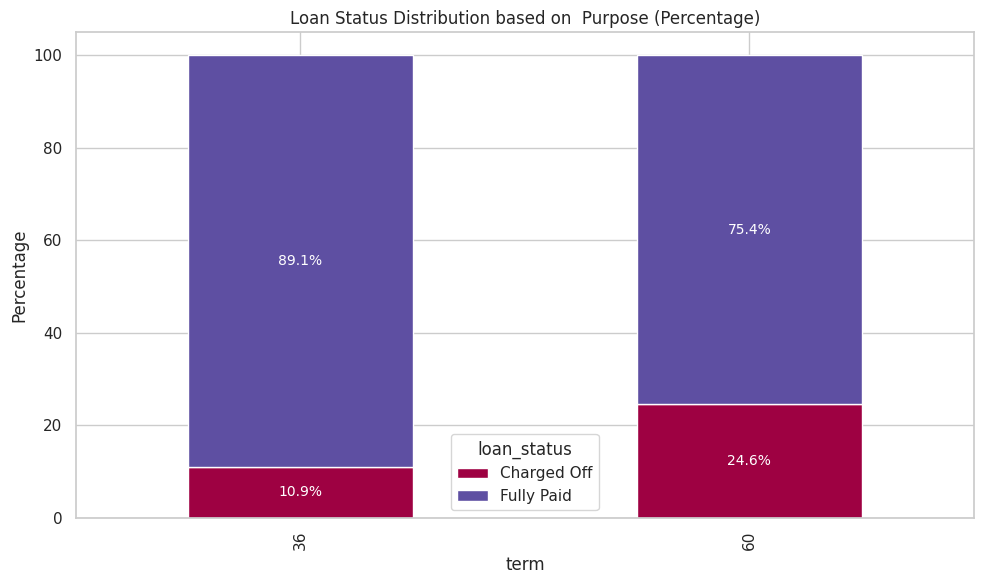

In [470]:
# Distribution of Term based on loan_status
# Group by 'term' and 'loan_status', then sum the 'grade' for each combination
print(loan.groupby(['term'])['grade'].count())
grouped = loan.groupby(['term', 'loan_status'])['grade'].count().unstack()

# Normalize by dividing each value by the total for that purpose (convert to percentage)
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Spectral')

# Set labels and title
ax.set_ylabel('Percentage')
ax.set_title('Loan Status Distribution based on  Purpose (Percentage)')

# Add percentage labels inside the bars
for p in ax.patches:
    # Get the height of each bar (i.e., the percentage)
    height = p.get_height()
    # Get the width and position of the bar
    width = p.get_width()
    x_pos = p.get_x() + width / 2  # Position the label in the middle of the bar
    y_pos = p.get_y() + height / 2  # Position the label in the middle of the segment

    # Add the label (formatted to 1 decimal place)
    ax.text(x_pos, y_pos, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Show the plot
plt.tight_layout()
plt.show()

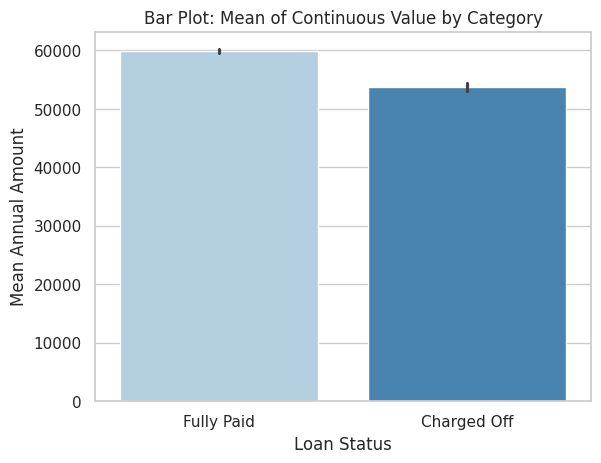

In [471]:
# Distribution of Loan Amt based on loan_status Mean Value
sns.barplot(x='loan_status', y='annual_inc', data=loan, estimator='mean', palette="Blues")

# Set labels and title
plt.xlabel('Loan Status')
plt.ylabel('Mean Annual Amount')
plt.title('Bar Plot: Mean of Continuous Value by Category')

plt.show()

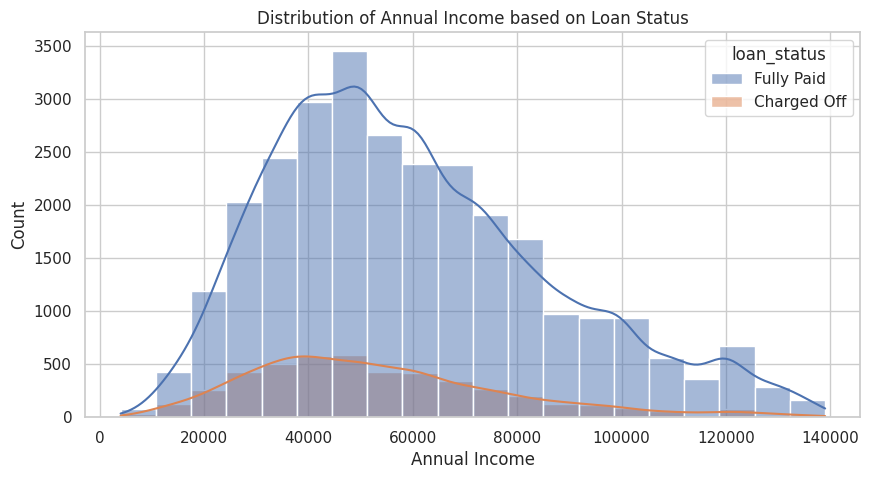

In [450]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income based on Loan Status')
plt.show()

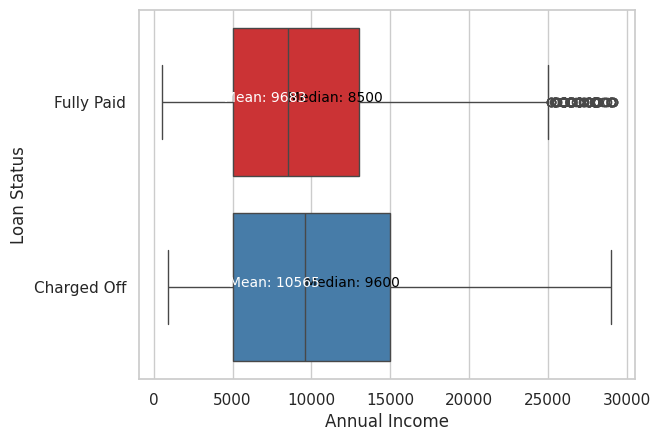

In [451]:
# Distribution of loan_amnt based on loan_status

# Define a color palette for loan status categories
palette = sns.color_palette("Set1", n_colors=len(loan.loan_status.unique()))

# Create the boxplot with coloring based on loan status
ax = sns.boxplot(data=loan, x='loan_amnt', y='loan_status', palette=palette)

# Set plot labels and title
plt.xlabel('Annual Income')
plt.ylabel('Loan Status')

# Add the mean or median values for each category
for i, loan_status in enumerate(loan['loan_status'].unique()):
    # Calculate the median and mean
    median_value = loan[loan['loan_status'] == loan_status]['loan_amnt'].median()
    mean_value = loan[loan['loan_status'] == loan_status]['loan_amnt'].mean()

    # Add text annotations for the median and mean
    ax.text(median_value, i, f'Median: {median_value:.0f}', horizontalalignment='left', size=10, color='black')
    ax.text(mean_value, i, f'Mean: {mean_value:.0f}', horizontalalignment='right', size=10, color='white')

# Display the plot
plt.show()

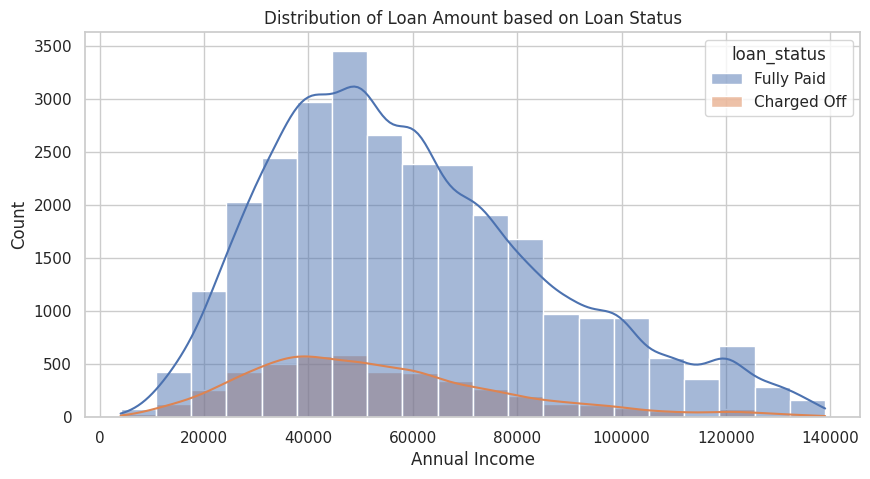

In [452]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount based on Loan Status')
plt.show()

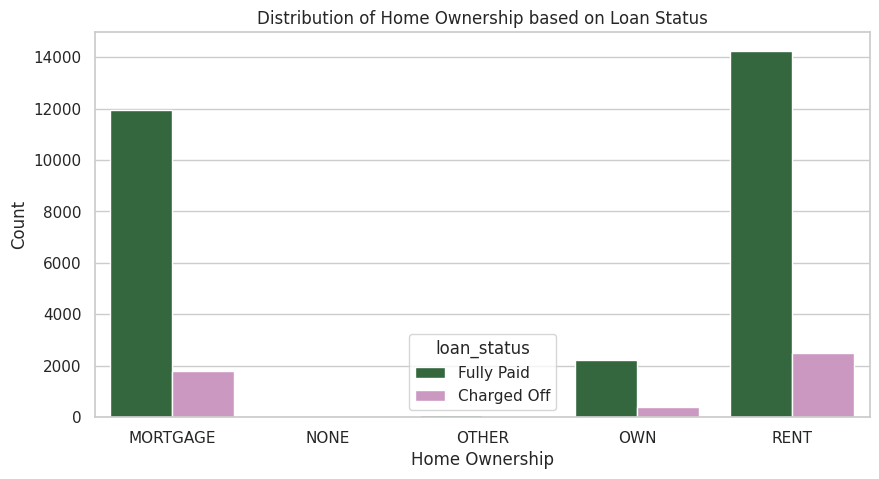

In [453]:
# Distribution of home_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='home_ownership',hue='loan_status',palette='cubehelix')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership based on Loan Status')
plt.show()

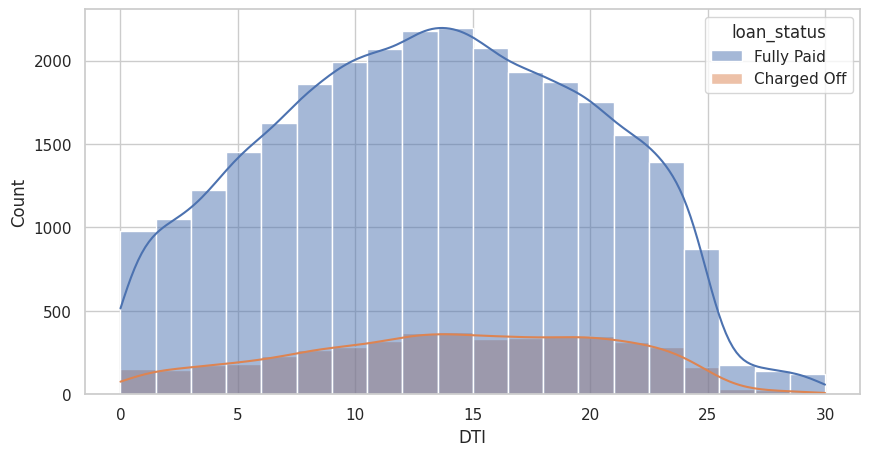

In [454]:
# Distribution of dti based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='dti',hue='loan_status',bins=20,kde=True)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.show()

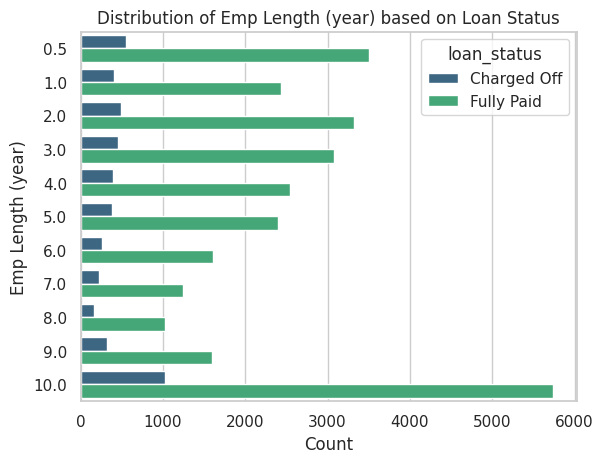

In [455]:
# Distribution of Emp Length (year) based on loan_status
sns.countplot(data=loan,y='emp_length',hue='loan_status',palette="viridis")
plt.xlabel('Count')
plt.ylabel('Emp Length (year)')
plt.title('Distribution of Emp Length (year) based on Loan Status')
plt.show()

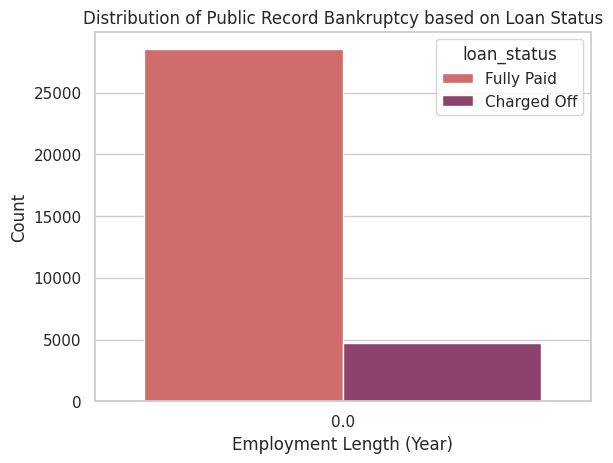

In [472]:
# Distribution of pub_rec_bankruptcies based on loan_status
sns.countplot(data=loan,x='pub_rec_bankruptcies',hue='loan_status',palette='flare')
plt.xlabel('Employment Length (Year)')
plt.ylabel('Count')
plt.title('Distribution of Public Record Bankruptcy based on Loan Status')
plt.show()

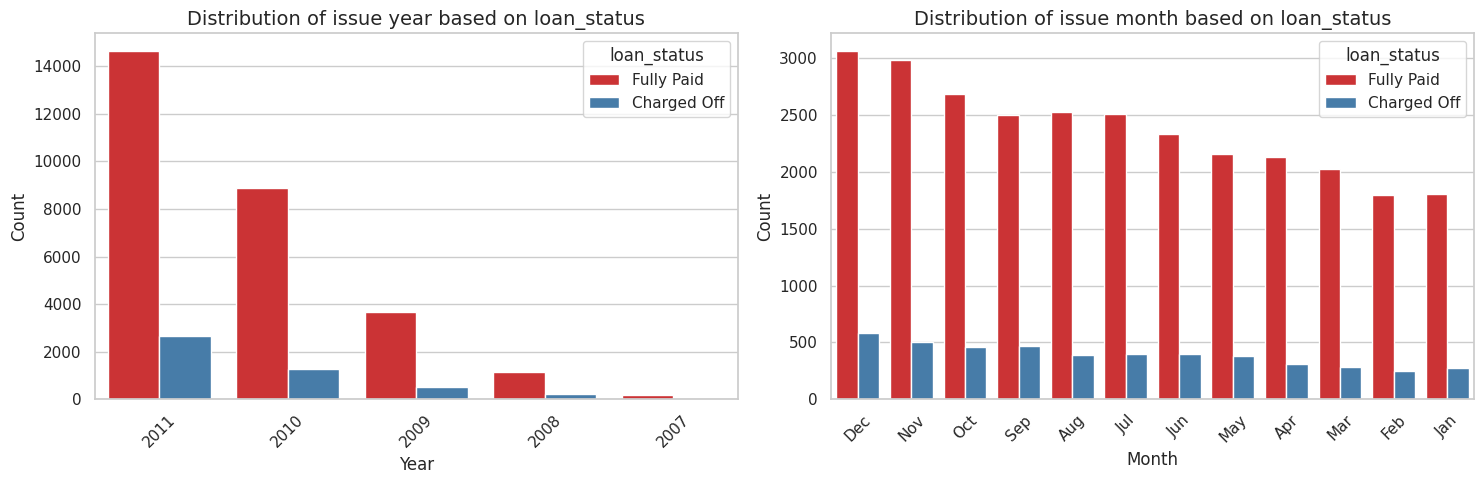

In [457]:
# Distribution of issue_date based on loan_status
loan['Year'] = '20' + loan['issue_d'].str[-2:]
loan['Month'] = loan['issue_d'].str[0:3]
# Distribution of SubGrade based on loan_status
# Set up the figure with 3x3 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# Flatten axes for easier indexing
axes = axes.flatten()
sns.countplot(data=loan,x='Year',hue='loan_status' ,ax=axes[0], palette='Set1')

# Set plot title and labels
axes[0].set_title('Distribution of issue year based on loan_status', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=loan,x='Month',hue='loan_status' ,ax=axes[1], palette='Set1')

# Set plot title and labels
axes[1].set_title('Distribution of issue month based on loan_status', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# **Main Takeaways :**
1. Fewer Defaults Compared to Fully Paid Loans:
    The data shows that defaulted loans are fewer than those that are fully paid, indicating a relatively stable loan repayment behavior across the dataset.
2. High Loan Amounts in the 10,000 Range:
    The maximum loan amounts fall within the $10,000 range, with interest rates between 10% and 15%. This suggests that loans in this range might be more common and potentially riskier due to the higher interest rates associated with them.
3. Debt Consolidation and Credit Card Loans Predominate:
    Debt consolidation and credit card purposes dominate the loan types, indicating that a large portion of borrowers are seeking to consolidate debt or finance personal expenses, which might have different risk profiles.
4. Loan Amounts by Grade:
    Grades A, B, and C have the highest loan amounts, but grades B and C also show a higher number of charged-off customers. This highlights a need for caution when evaluating loans in these grades despite their larger loan amounts.
5. Loan Amounts by Sub Grade Categories:
    For each grade (A to G), the highest loan amounts are found in specific subcategories (A5, A4, B3, B4, B5,C1, C2, D2, D3, E1, E2, F1, F2, G1, G2). However, the charged-off rates within these grades remain relatively consistent, suggesting that the loan amount alone may not be the best predictor of default risk.
6. 36-Month Loans Have Lower Default Rates:
    Loans with a 36-month tenure show a significantly lower charged-off rate compared to 60-month loans, and more loans fall into the 36-month category. This suggests that shorter-term loans might be safer and more manageable for borrowers.
7. Loan Amount and Repayment Status:
    Larger loan amounts correlate with Fully Paid loans (around $60,000), indicating that higher loan amounts might be associated with better repayment behavior. Additionally, fully paid loans tend to have a higher percentage of repayment as the loan amount increases.
8. Income and Default Likelihood:
    Borrowers with an annual income around $40,000 are more likely to default, but the likelihood of default decreases significantly as income increases. This suggests that higher income is a good indicator of better repayment ability.
9. Borrowers in Rent or Mortgage:
    Borrowers living in rented properties or with mortgages are more common. However, the default rate is higher among those with mortgages, highlighting a potential risk factor for loans associated with home ownership.
10. DTI Ratio and Default Likelihood:
    Borrowers with a DTI ratio between 10% and 25% are more likely to default, and as the DTI ratio increases, the likelihood of default also increases. This suggests that high debt burdens relative to income could be a strong indicator of default risk.
12. Employment Length and Default Rate:
    Borrowers with more than 10 years of employment tend to have higher loan amounts and higher charged-off rates, indicating that longer employment doesn't necessarily guarantee better repayment behavior. Conversely, shorter employment lengths are associated with lower charged-off rates.
13. Bankruptcy Records and Default Insights:
    Public record bankruptcy data shows 0.0 charged-off rates, suggesting that bankruptcy may not be a significant predictor of default in this dataset, or it may be underrepresented.
14. Trends Over Time:
    Borrower numbers increase over the years, with a notable rise in 2011, and December and Novemberseeing the highest number of borrowers. This suggests seasonal and yearly fluctuations in loan issuance.

# **Risk Factors :**
1. Caution with Grade B and C Loans:
    Grade B and C loans, despite having higher loan amounts, have a higher percentage of charged-off loans. This suggests that loan amount alone may not be a good indicator of loan quality in these grades, and additional factors (like credit history) should be considered.
2. Low Default Rate in Short-Term Loans:
    36-month loans have a significantly lower charged-off rate compared to 60-month loans, indicating that short-term loans might be less risky. However, be cautious about over-relying on loan tenure as a risk factor without accounting for other variables.
3. Income and Loan Repayment:
    Borrowers with an annual income around $40,000 are more likely to default, suggesting that those with moderate incomes might struggle to meet higher loan payments. Income growth should be carefully considered in future loan assessments.
4. Mortgage Borrowers Are at Higher Risk:
    While renters and mortgage holders are more common, those with mortgages tend to have a higher charged-off rate, which could suggest that mortgage-backed loans have greater default risk compared to other loan types.
5. Public Record Bankruptcy Data:
    The 0.0 rate for public bankruptcy records could indicate either a lack of bankruptcy data or that bankruptcy records do not significantly affect loan defaults. Careful interpretation of this variable is needed, as it might not offer much predictive value in this analysis.
5. Borrower Numbers Show Seasonal and Yearly Trends:
    While borrower numbers have increased over time, seasonal patterns (e.g., higher numbers in December and November) should be accounted for when analyzing loan issuance trends to avoid misinterpretation.

# **Final Thoughts:**
These insights highlight key trends in the dataset, such as loan amount, income, loan tenure, and employment length as important factors influencing loan repayment behavior. However, some of the patterns suggest that loan defaults are driven by a combination of factors, including DTI ratios, income levels, and loan purposes. Hence, it's important to approach the analysis with an understanding that these relationships may be complex, and further exploration of additional features (such as credit scores, loan-to-income ratios, or payment history) could provide deeper insights

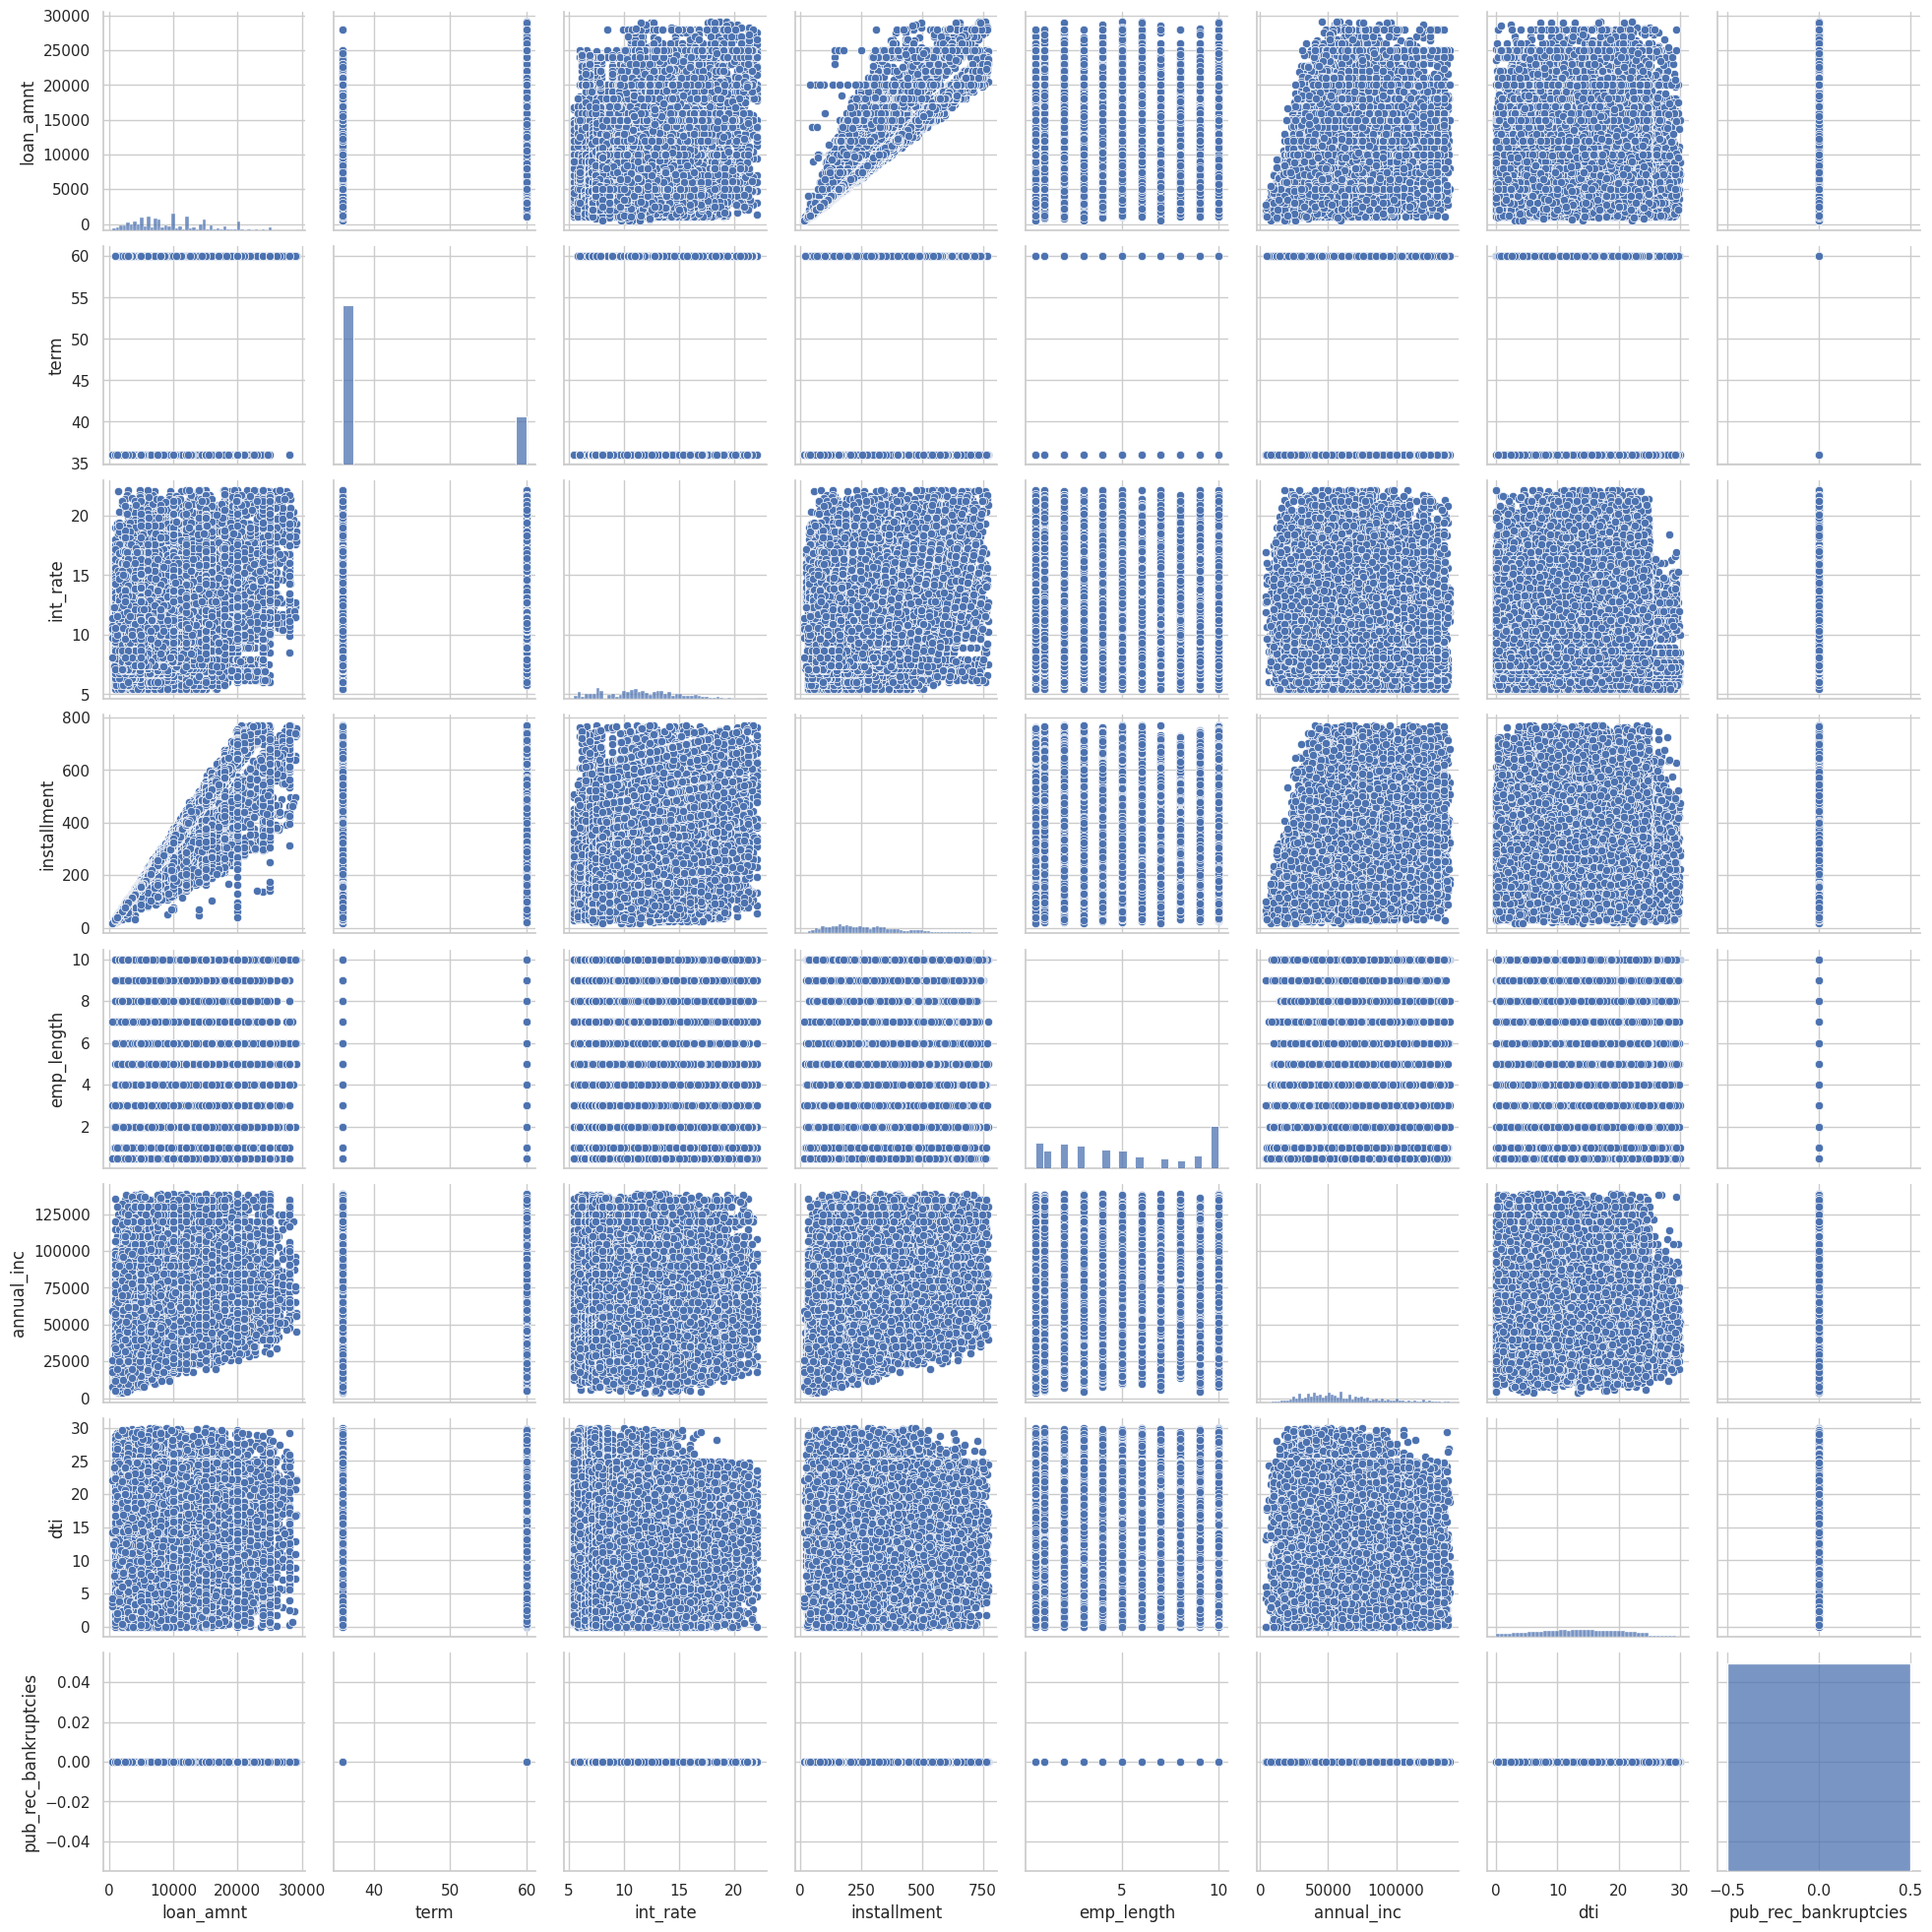

In [483]:
sns.pairplot(loan)